In [2]:
# Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [886]:
# Import data

from pathlib import Path
cwd = Path.cwd()
datapath = (cwd.parent / 'data/').resolve()

df = pd.read_csv(datapath / 'RecessionTimingRawData2024.csv')

In [887]:
# Set up columns

for i in (3,6,12):
    for var in ("ur",):
        df["s"+str(i)+"_"+var] = df[var].diff(i)
    for var in ('emp','sp500','ip'):
        df["s"+str(i)+"_ln"+var] = np.log(df[var]).diff(i)
df["rbaar10yr"] = df.rbaa - df.r10yr
df["r10yrr3yr"] = df.r10yr - df.r3yr
df["s3_r10yrr3yr"] = df.r10yrr3yr.diff(3)
# df["s12_rff"] = df.rff.diff(i) # not enough history...
        
df.head(24)

,period,r10yr,rff,rbaa,r3mo,r1yr,r3yr,r5yr,rec,rec12mo,...,s3_lnsp500,s3_lnip,s6_ur,s12_ur,s12_lnemp,s12_lnsp500,s12_lnip,rbaar10yr,r10yrr3yr,s3_r10yrr3yr
0,4/1/1953,2.83,NaN,3.65,2.19,2.36,2.51,2.62,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.82,0.32,NaN
1,5/1/1953,3.05,NaN,3.78,2.16,2.48,2.72,2.87,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.73,0.33,NaN
2,6/1/1953,3.11,NaN,3.86,2.11,2.45,2.74,2.94,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.75,0.37,NaN
3,7/1/1953,2.93,NaN,3.86,2.04,2.38,2.62,2.75,0.0,1.0,...,-0.017143,0.013677,NaN,NaN,NaN,NaN,NaN,0.93,0.31,-0.01
4,8/1/1953,2.95,NaN,3.85,2.04,2.28,2.58,2.80,1.0,1.0,...,-0.018282,0.002737,NaN,NaN,NaN,NaN,NaN,0.90,0.37,0.04
5,9/1/1953,2.87,NaN,3.88,1.79,2.20,2.56,2.71,1.0,1.0,...,-0.028803,-0.013847,NaN,NaN,NaN,NaN,NaN,1.01,0.31,-0.06
6,10/1/1953,2.66,NaN,3.82,1.38,1.79,2.23,2.43,1.0,1.0,...,-0.013262,-0.034554,0.4,NaN,NaN,NaN,NaN,1.16,0.43,0.12
7,11/1/1953,2.68,NaN,3.75,1.44,1.67,2.20,2.42,1.0,1.0,...,0.004500,-0.053309,1.0,NaN,NaN,NaN,NaN,1.07,0.48,0.11
8,12/1/1953,2.59,NaN,3.74,1.60,1.66,2.07,2.32,1.0,1.0,...,0.064888,-0.057406,2.0,NaN,NaN,NaN,NaN,1.15,0.52,0.21
9,1/1/1954,2.48,NaN,3.71,1.18,1.41,1.89,2.17,1.0,1.0,...,0.060306,-0.056415,2.3,NaN,NaN,NaN,NaN,1.23,0.59,0.16


In [888]:
df.columns

Index(['period', 'r10yr', 'rff', 'rbaa', 'r3mo', 'r1yr', 'r3yr', 'r5yr', 'rec',
       'rec12mo', 'r10yrff', 'emp', 'ur', 'sp500', 'ip', 'cycle', 'r10yrffma',
       's6_lnsp500', 's6_lnemp', 's6_lnip', 's3_ur', 's3_lnemp', 's3_lnsp500',
       's3_lnip', 's6_ur', 's12_ur', 's12_lnemp', 's12_lnsp500', 's12_lnip',
       'rbaar10yr', 'r10yrr3yr', 's3_r10yrr3yr'],
      dtype='object')

In [902]:
# Select subset of data

# xlist = ['r10yrffma','r10yr','rff','rbaa','r3mo','r1yr','r3yr','r5yr','ur','s6_lnsp500','s6_lnemp','s6_lnip','s6_ur','s12_ur','s12_lnemp','s12_lnsp500','s12_lnip']
# xlist = ['r10yrffma','rbaar10yr','r10yrr3yr','r10yr','rff','rbaa','r3mo','r1yr','r3yr','r5yr','ur','s3_ur','s3_lnemp','s3_lnsp500','s6_lnsp500','s6_lnemp','s6_lnip','s6_ur','s12_ur','s12_lnemp','s12_lnsp500','s12_lnip']
# xlist = ['r10yrffma','s6_lnsp500','s6_lnemp']
xlist = ['r10yrffma','s6_lnsp500','s6_lnemp','s3_ur','s6_lnip','rbaar10yr','r10yrr3yr']

# df2_oos = df[["period","rec12mo"]+xlist][~np.isnan(df.r10yrffma) & np.isnan(df.rec)]
df2_oos = df[["period","rec12mo"]+xlist][df.index>=779] # 791

df2_valid = df2_oos[df2_oos.index<=804]

# df2 = df[["period","rec12mo"]+xlist][~np.isnan(df.r10yrffma) & ~np.isnan(df.rec)]
df2 = df[["period","rec12mo"]+xlist][~np.isnan(df.r10yrffma) & ~np.isnan(df.rec)]
df2 = df2[df2.index<779]
df2

,period,rec12mo,r10yrffma,s6_lnsp500,s6_lnemp,s3_ur,s6_lnip,rbaar10yr,r10yrr3yr
20,12/1/1954,0.0,1.40,0.189718,0.008878,-1.1,0.042249,0.94,0.70
21,1/1/1955,0.0,1.36,0.166824,0.013445,-0.8,0.063330,0.84,0.62
22,2/1/1955,0.0,1.39,0.179987,0.016615,-0.6,0.077292,0.82,0.53
23,3/1/1955,0.0,1.40,0.148913,0.021772,-0.4,0.098947,0.80,0.42
24,4/1/1955,0.0,1.35,0.159905,0.026335,-0.2,0.099171,0.74,0.38
...,...,...,...,...,...,...,...,...,...
774,10/1/2017,0.0,1.17,0.080465,0.006634,-0.1,0.009850,1.96,0.68
775,11/1/2017,0.0,1.14,0.079521,0.006713,-0.2,0.011233,1.92,0.54
776,12/1/2017,0.0,1.13,0.090424,0.006345,-0.2,0.011240,1.82,0.44
777,1/1/2018,0.0,1.13,0.128210,0.006079,-0.2,0.012896,1.68,0.43


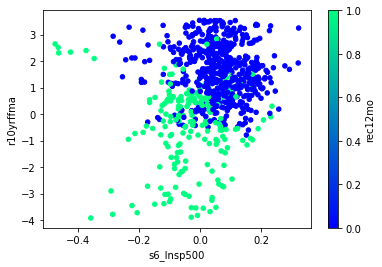

In [966]:
# Scatter plot of SP500 vs Emp (during recessions and expansions)

fig, ax = plt.subplots()
sc = df2.plot.scatter(x='s6_lnsp500', y='r10yrffma', c='rec12mo', colormap='winter', ax=ax) # rainbow

In [8]:
# axes = pd.plotting.scatter_matrix(df2, alpha = 0.2, figsize = (9, 9), range_padding = 0.15)

In [903]:
from sklearn.model_selection import train_test_split

y = df2["rec12mo"]
X = df2[xlist]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 0.33

y_valid = df2_valid["rec12mo"]
X_valid = df2_valid[xlist]

y_oos = df2_oos["rec12mo"]
X_oos = df2_oos[xlist]

In [904]:
# Models: Logistic, Random Forest, SVC, Voting Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

log_clf = LogisticRegression(random_state=42,max_iter=500)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42, probability=True)
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='soft') # hard
mlp_clf = MLPClassifier(hidden_layer_sizes=[50,3,2],random_state=42,max_iter=2000,activation='logistic',alpha=0.001)

voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf, mlp_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9013157894736842
RandomForestClassifier 0.9473684210526315
SVC 0.8881578947368421
VotingClassifier 0.8947368421052632
MLPClassifier 0.9078947368421053


In [968]:
# nn diff parameters?

# mlp_clf2 = MLPClassifier(hidden_layer_sizes=[3],random_state=42,max_iter=2000,activation='logistic',alpha=0.1) # 0.8077
# mlp_clf2 = MLPClassifier(hidden_layer_sizes=[8],random_state=42,max_iter=2000,activation='relu',alpha=1) # 0.8461
# mlp_clf2 = MLPClassifier(hidden_layer_sizes=[8,5],random_state=42,max_iter=2000,activation='relu',alpha=1.6) # 0.8846
# mlp_clf2 = MLPClassifier(hidden_layer_sizes=[4],random_state=42,max_iter=2000,activation='logistic',solver='sgd',alpha=0.01) # 0.8846
# mlp_clf2 = MLPClassifier(hidden_layer_sizes=[3],random_state=42,max_iter=2000,activation='relu',solver='sgd',alpha=0.1) # 0.9231 (but predictions are weird)
# mlp_clf2 = MLPClassifier(hidden_layer_sizes=[8,5],random_state=42,max_iter=2000,activation='relu',solver='sgd',alpha=0.1) # [8,5] misses rec, [8,3] misses early

mlp_clf2 = MLPClassifier(hidden_layer_sizes=[4],random_state=42,max_iter=2000,activation='logistic',solver='sgd',alpha=0.01)

mlp_clf2.fit(X_train, y_train)
y_pred = mlp_clf2.predict(X_test)
print(mlp_clf2.__class__.__name__, accuracy_score(y_test, y_pred))
y_pred_valid = mlp_clf2.predict(X_valid)
print(mlp_clf2.__class__.__name__, accuracy_score(y_valid, y_pred_valid))

MLPClassifier 0.8552631578947368
MLPClassifier 0.8846153846153846


In [969]:
print(mlp_clf2.coefs_)
print(mlp_clf2.intercepts_)

[array([[ 1.32871915e+00, -2.19289149e-02, -9.87377294e-01,
        -7.19237246e-01],
       [-7.83150020e-02, -3.06666444e-01, -4.98940328e-01,
         2.40847417e-01],
       [ 1.09754270e-01,  1.71551226e-01, -4.16700510e-01,
         3.85677646e-01],
       [-5.34901834e-01, -1.65187494e-01,  2.55634548e-01,
        -9.14760832e-04],
       [-9.63974695e-02,  1.37844977e-02, -9.97043807e-02,
        -1.95712656e-01],
       [-6.07379681e-01, -4.27541906e-01,  2.63922647e-01,
         6.89049420e-02],
       [ 1.03460386e-01,  1.09937206e-01, -4.09938653e-01,
        -1.36496847e-01]]), array([[-2.28533354],
       [-0.02487183],
       [ 1.49712641],
       [ 0.761499  ]])]
[array([ 0.12159062, -0.46912293,  0.09070362, -0.28488588]), array([-0.63602866])]


In [964]:
# combine 2 nn's?

mlp_clf3a = MLPClassifier(hidden_layer_sizes=[8,3],random_state=42,max_iter=2000,activation='relu',solver='sgd',alpha=0.1) # [8,5] misses rec, [8,3] misses early
mlp_clf3a.fit(X_train, y_train)
y_pred_test3a = mlp_clf3a.predict_proba(X_test)
y_pred_valid3a = mlp_clf3a.predict_proba(X_valid)

mlp_clf3b = MLPClassifier(hidden_layer_sizes=[8,5],random_state=42,max_iter=2000,activation='relu',solver='sgd',alpha=0.1) # [8,5] misses rec, [8,3] misses early
mlp_clf3b.fit(X_train, y_train)
y_pred_test3b = mlp_clf3b.predict_proba(X_test)
y_pred_valid3b = mlp_clf3b.predict_proba(X_valid)

y_pred_test3 = (y_pred_test3a+y_pred_test3b)/2
y_pred_valid3 = (y_pred_valid3a+y_pred_valid3b)/2

y_pred_test3scr = np.round(y_pred_test3[:,1])
y_pred_valid3scr = np.round(y_pred_valid3[:,1])

print(mlp_clf3a.__class__.__name__, accuracy_score(y_test, y_pred_test3scr))
print(mlp_clf3a.__class__.__name__, accuracy_score(y_valid, y_pred_valid3scr))

MLPClassifier 0.881578947368421
MLPClassifier 0.8846153846153846


In [906]:
# try nn

# from sklearn.neural_network import MLPClassifier
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler

# clf_mlp = MLPClassifier(hidden_layer_sizes=[50,50,50], random_state=42)
# pipeline = make_pipeline(Standard)


In [907]:
# feature importances (from random forest)

for name, score in zip(list(X_train), rnd_clf.feature_importances_):
    print(name,":", round(score,2))

r10yrffma : 0.3
s6_lnsp500 : 0.11
s6_lnemp : 0.11
s3_ur : 0.14
s6_lnip : 0.13
rbaar10yr : 0.05
r10yrr3yr : 0.15


In [908]:
# Model: Decision Tree

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
print(tree_clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.9276315789473685


In [909]:
# Model: Bagging ensembles (of Decision Trees)

from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=350, bootstrap=True, n_jobs=-1, random_state=42) # 100
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(bag_clf.__class__.__name__, accuracy_score(y_test, y_pred))

BaggingClassifier 0.9276315789473685


In [910]:
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=200, # 2 200
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
print(ada_clf.__class__.__name__, accuracy_score(y_test, y_pred))

AdaBoostClassifier 0.9605263157894737


In [911]:
# Random forest parameters

rnd_clf2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=32, n_jobs=-1, random_state=42)
rnd_clf2.fit(X_train, y_train)
y_pred = rnd_clf2.predict(X_test)
display(accuracy_score(y_test, y_pred))

0.9407894736842105

In [912]:
# Train/test/validate error

for clf in (log_clf, rnd_clf, svm_clf, voting_clf, tree_clf, bag_clf, ada_clf, rnd_clf2, mlp_clf, mlp_clf2):
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    y_pred_valid = clf.predict(X_valid)
    print(clf.__class__.__name__,"- train:", round(accuracy_score(y_train, y_pred_train),4), "- test:", round(accuracy_score(y_test, y_pred_test),4), "- validate:", round(accuracy_score(y_valid, y_pred_valid),4))

LogisticRegression - train: 0.8995 - test: 0.9013 - validate: 0.7308
RandomForestClassifier - train: 1.0 - test: 0.9474 - validate: 0.6154
SVC - train: 0.9044 - test: 0.8882 - validate: 0.7308
VotingClassifier - train: 0.944 - test: 0.8947 - validate: 0.6538
DecisionTreeClassifier - train: 1.0 - test: 0.9276 - validate: 0.6154
BaggingClassifier - train: 0.9901 - test: 0.9276 - validate: 0.5769
AdaBoostClassifier - train: 1.0 - test: 0.9605 - validate: 0.5769
RandomForestClassifier - train: 0.9934 - test: 0.9408 - validate: 0.5769
MLPClassifier - train: 0.9193 - test: 0.9079 - validate: 0.6538
MLPClassifier - train: 0.8863 - test: 0.8816 - validate: 0.8846


In [922]:
# Predictions on random set of test data

pred_test = log_clf.predict_proba(X_test)
dfpred_test = pd.DataFrame(pred_test, index = X_test.index.values)
pred_test2 = mlp_clf2.predict_proba(X_test) # svm_clf mlp_clf2
dfpred_test2 = pd.DataFrame(pred_test, index = X_test.index.values)
xb_test = pd.concat([y_test,X_test,dfpred_test,dfpred_test2], axis=1)
xb_test #.tail()

,rec12mo,r10yrffma,s6_lnsp500,s6_lnemp,s3_ur,s6_lnip,rbaar10yr,r10yrr3yr,0,1,0,1
413,0.0,1.86,0.085794,0.014553,-0.3,0.036124,1.89,0.75,0.983275,0.016725,0.983275,0.016725
535,0.0,0.66,0.119589,0.013607,-0.2,0.049017,1.54,0.12,0.887781,0.112219,0.887781,0.112219
117,0.0,1.00,0.132785,0.006597,0.3,0.019908,1.08,0.43,0.830147,0.169853,0.830147,0.169853
531,0.0,1.13,0.188638,0.014308,-0.2,0.037553,1.53,0.22,0.953184,0.046816,0.953184,0.046816
129,0.0,0.63,0.101516,0.012128,0.1,0.030500,0.66,0.13,0.843879,0.156121,0.843879,0.156121
...,...,...,...,...,...,...,...,...,...,...,...,...
567,1.0,0.07,0.032715,0.009262,0.2,0.015420,2.30,-0.23,0.296463,0.703537,0.296463,0.703537
358,0.0,1.69,0.291778,-0.005003,-0.4,-0.010371,3.23,0.81,0.977802,0.022198,0.977802,0.022198
326,1.0,-2.64,0.060919,-0.006317,1.3,-0.056235,2.93,0.87,0.000295,0.999705,0.000295,0.999705
301,0.0,1.19,0.032660,0.027374,-0.3,0.036088,1.14,0.28,0.962241,0.037759,0.962241,0.037759


In [970]:
# Predictions on validation data

pred_valid = log_clf.predict_proba(X_valid)
dfpred_valid = pd.DataFrame(pred_valid, index = df2_valid.index.values)
# pred_valid2 = mlp_clf2.predict_proba(X_valid) # svm_clf mlp_clf2
pred_valid2 = y_pred_valid3
dfpred_valid2 = pd.DataFrame(pred_valid2, index = df2_valid.index.values)
xb_valid = pd.concat([df2_valid,dfpred_valid,dfpred_valid2], axis=1)
xb_valid

,period,rec12mo,r10yrffma,s6_lnsp500,s6_lnemp,s3_ur,s6_lnip,rbaar10yr,r10yrr3yr,0,1,0,1
779,3/1/2018,0.0,1.24,0.080855,0.008677,-0.1,0.024510,1.80,0.42,9.225501e-01,0.077450,0.880256,0.119744
780,4/1/2018,0.0,1.24,0.037094,0.008661,0.0,0.022989,1.80,0.35,8.852082e-01,0.114792,0.862576,0.137424
781,5/1/2018,0.0,1.25,0.040753,0.009320,-0.3,0.011111,1.85,0.32,9.468173e-01,0.053183,0.906694,0.093306
782,6/1/2018,0.0,1.25,0.033225,0.009761,0.0,0.016957,1.92,0.26,8.736065e-01,0.126394,0.854180,0.145820
783,7/1/2018,0.0,1.22,0.001375,0.009141,-0.2,0.018948,1.90,0.19,9.138226e-01,0.086177,0.884715,0.115285
784,8/1/2018,0.0,1.14,0.054898,0.008206,0.0,0.022494,1.88,0.18,8.613516e-01,0.138648,0.832640,0.167360
785,9/1/2018,0.0,1.09,0.070951,0.007264,-0.3,0.018163,1.88,0.16,9.337822e-01,0.066218,0.878394,0.121606
786,10/1/2018,0.0,1.06,0.048485,0.007377,0.0,0.005721,1.92,0.21,8.406088e-01,0.159391,0.805565,0.194435
787,11/1/2018,0.0,1.00,0.008015,0.005811,0.0,0.015598,2.10,0.21,7.930810e-01,0.206919,0.764428,0.235572
788,12/1/2018,0.0,0.91,-0.070323,0.005596,0.2,0.007744,2.30,0.16,5.646699e-01,0.435330,0.631663,0.368337


In [971]:
# Predictions on out-of-sample data

pred_oos = log_clf.predict_proba(X_oos)
dfpred_oos = pd.DataFrame(pred_oos, index = df2_oos.index.values)
pred_oos2 = mlp_clf2.predict_proba(X_oos) # svm_clf mlp_clf2
dfpred_oos2 = pd.DataFrame(pred_oos2, index = df2_oos.index.values)
xb_oos = pd.concat([df2_oos,dfpred_oos,dfpred_oos2], axis=1)
xb_oos.tail(48) # 18

,period,rec12mo,r10yrffma,s6_lnsp500,s6_lnemp,s3_ur,s6_lnip,rbaar10yr,r10yrr3yr,0,1,0,1
805,5/1/2020,NaN,0.32,-0.061531,-0.131031,9.7,-0.172387,3.28,0.45,4.052314e-13,1.000000e+00,0.250501,0.749499
806,6/1/2020,NaN,0.37,-0.022954,-0.097761,6.6,-0.106813,2.91,0.51,4.815600e-09,1.000000e+00,0.276638,0.723362
807,7/1/2020,NaN,0.43,-0.021766,-0.087977,-4.6,-0.064816,2.69,0.45,9.999982e-01,1.825191e-06,0.860715,0.139285
808,8/1/2020,NaN,0.53,0.034310,-0.078756,-4.8,-0.058186,2.62,0.49,9.999993e-01,7.064586e-07,0.878690,0.121310
809,9/1/2020,NaN,0.59,0.238119,-0.062045,-3.2,-0.018840,2.68,0.52,9.999639e-01,3.605958e-05,0.833871,0.166129
810,10/1/2020,NaN,0.61,0.213315,0.088525,-3.4,0.130900,2.65,0.60,9.999821e-01,1.787358e-05,0.850290,0.149710
811,11/1/2020,NaN,0.63,0.195212,0.070522,-1.7,0.119194,2.43,0.65,9.979505e-01,2.049544e-03,0.781830,0.218170
812,12/1/2020,NaN,0.67,0.174160,0.034718,-1.1,0.067695,2.23,0.74,9.900234e-01,9.976620e-03,0.767656,0.232344
813,1/1/2021,NaN,0.74,0.167826,0.026058,-0.4,0.038903,2.16,0.88,9.403702e-01,5.962976e-02,0.744032,0.255968
814,2/1/2021,NaN,0.85,0.135385,0.018782,-0.5,-0.005372,2.16,1.05,9.592442e-01,4.075579e-02,0.780703,0.219297


In [ ]:
# get plot to accept more than two X vars in classifier (but still only charting 2)
# x add more vars to classifier
# x see if way to play with svm parameters? higher dimensions?
# x play with random forest/bagging parameters? (see other notebook)
# x change from rec to rec12mo?
# x predict values for full df (look at months leading up to covid rec)
# x any other features? IP, more interest rates, 3/6/9/12mo growth rates?

# more growth rates (3 and 9) and do interest rate spreads instead of levels (maybe keep rff level too...)
# x calc training/test/(valid?) errors
# x should i keep the 2020 recession as out of sample too? just the rec12mo period, or also the expansion before?

# look at diff ensemble regressions to use (see other notebook and google results)
# sqrt rectime?

# try training a model on each expansion/recession time period window, then average all predictions together?
# try training a model for expansion/prerecession/recession?
